# Categorização de imagens utilizando CNN - Fashion MNIST

Este exemplo utiliza a base de dados Fashion MNIST, que consiste em um conjunto de imagens pertencentes a 10 categorias.

Fonte: https://keras.io/api/datasets/fashion_mnist/

Importante: Para este exemplo será preciso ativar a GPU para diminuir o tempo de processamento.

Para isso, clique em Editar > Configurações de notebook > GPU.

## Etapa 01
Importar as bibliotecas de aprendizado de máquina e computação científica.

In [1]:
#Bibliotecas de aprendizado de máquina
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

#Bibliotecas de computação científica
import numpy as np
import matplotlib.pyplot as plt

2024-10-21 14:12:58.749379: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 14:12:58.841486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 14:12:58.870719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 14:12:59.003790: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-21 14:13:00.536417: W tensorflow/compiler/tf2

## Etapa 02
Importar a base de dados Fashion MNIST do Keras.

Curiosidade: O Keras fornece um conjunto de base de dados para aprendizado. Veja mais em: https://keras.io/api/datasets/

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Etapa 03
Conhecer e plotar a base de dados.

x_train (60000, 28, 28)
y_train (60000,)
x_test (10000, 28, 28)
y_test (10000,)
Classes de imagens:  ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']


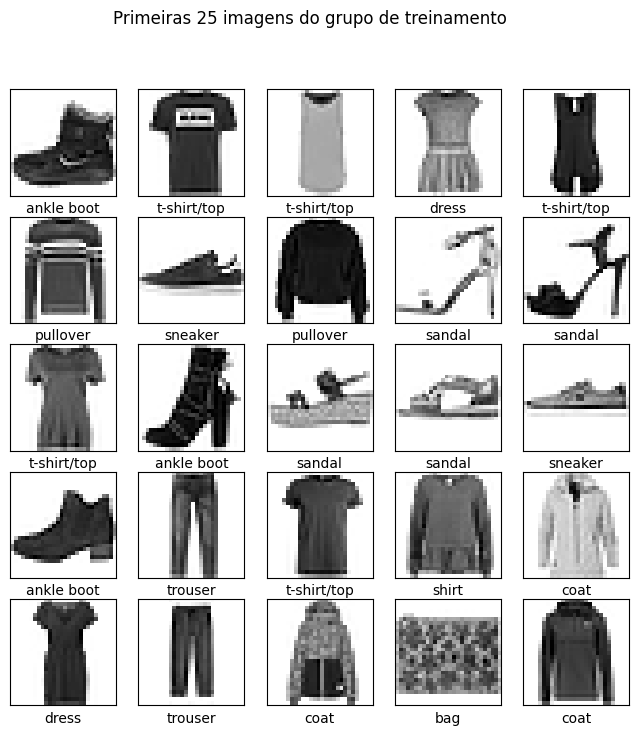

In [14]:
#Nome das categorias:
# Label               Descrição
# 0                   T-shirt/top
# 1                   Trouser
# 2                   Pullover
# 3                   Dress
# 4                   Coat
# 5                   Sandal
# 6                   Shirt
# 7                   Sneaker
# 8                   Bag
# 9                   Ankle boot

#Verificar a quantidade de dados para treinamento e validação
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

#Define uma lista com os nomes das categorias
class_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

print('Classes de imagens: ', class_names)

#Plotar imagem
plt.figure(figsize=(8,8))
plt.suptitle('Primeiras 25 imagens do grupo de treinamento')
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [15]:
x_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

##Etapa 04
Pré-processar as imagens de forma que os valores de intensidade para os pixels fiquem entre 0 e 1 e adicionar uma dimensão a mais em x_train e x_test para que fiquem com 4 dimensões no formato aceito pela CNN.

Formato aceito: (qtd imagens, qtd linhas, qtd colunas, qtd canais)

In [16]:
x_train = x_train / 255
x_test = x_test / 255

In [17]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


##Etapa 05
Construir a rede neural utilizando o Keras.

In [18]:
model = Sequential()
model.add(Conv2D(64, (2,2), activation='relu', input_shape=(28,28,1))),
model.add(MaxPooling2D(2,2)),
model.add(Dropout(0.3)),
model.add(Conv2D(64, (2,2), activation='relu')),
model.add(AveragePooling2D((2,2))),
model.add(Dropout(0.5)),
model.add(Flatten()),
model.add(Dense(256, activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 27, 27, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 609,418 (2.32 MB)

 Trainable params: 609,418 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

##Etapa 06
Compilar o modelo.

Optimizer: As opções são encontradas em https://keras.io/api/optimizers/

Loss: As opções são encontradas em https://keras.io/api/losses/

Metrics: As opções são encontradas em https://keras.io/api/metrics/

In [19]:
  optimizer = keras.optimizers.Adam(learning_rate = 0.001)
  model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

##Etapa 07
Treinar o modelo e realizar a validação.

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.9277 - sparse_categorical_accuracy: 0.6572 - val_loss: 0.4539 - val_sparse_categorical_accuracy: 0.8241
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4751 - sparse_categorical_accuracy: 0.8241 - val_loss: 0.3815 - val_sparse_categorical_accuracy: 0.8611
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4129 - sparse_categorical_accuracy: 0.8495 - val_loss: 0.3394 - val_sparse_categorical_accuracy: 0.8757
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3904 - sparse_categorical_accuracy: 0.8580 - val_loss: 0.3236 - val_sparse_categorical_accuracy: 0.8801
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3674 - sparse_categorical_accuracy: 0.8663 - val_loss: 0.3262 - val_sparse_categorical_accuracy: 0.8775
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3384 - sparse_categorical_accuracy: 0.8749 - val_loss: 0.2961 - val_sparse_categorical_accuracy: 0.891

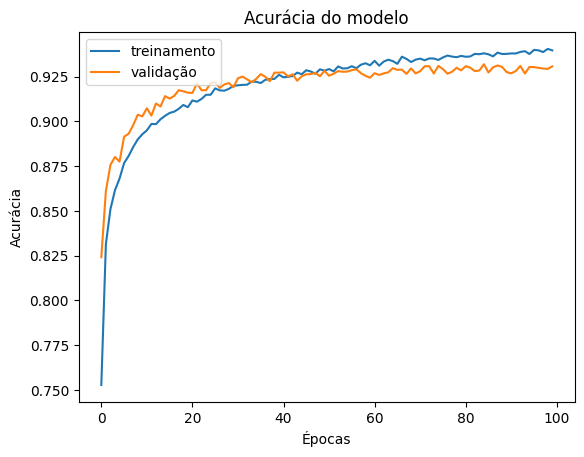

In [20]:
  history = model.fit(x_train, y_train, epochs=100, batch_size= 120, validation_data=(x_test, y_test))

  plt.plot(history.history['sparse_categorical_accuracy'])
  plt.plot(history.history['val_sparse_categorical_accuracy'])
  plt.title('Acurácia do modelo')
  plt.ylabel('Acurácia')
  plt.xlabel('Épocas')
  plt.legend(['treinamento', 'validação'], loc='upper left')
  plt.show()

##Etapa 08
Realizar algumas predições. Experimente variar a amostra (variável i).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


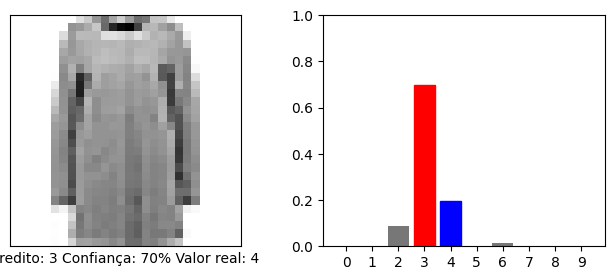

In [21]:
predictions = model.predict(x_test)
i = 150

def plot_image(prediction_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
  predicted_label = np.argmax(prediction_array)
  plt.xlabel('Predito: {} Confiança: {:2.0f}% Valor real: {}'.format(predicted_label, 100*np.max(prediction_array), true_label))

def plot_rate(prediction_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  thisplot = plt.bar(range(10), prediction_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(prediction_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(predictions[i], y_test[i], x_test[i])
plt.subplot(1,2,2)
plot_rate(predictions[i], y_test[i])
plt.show()

In [22]:
predictions[25]

array([4.19455209e-05, 1.29436355e-08, 1.79758132e-01, 1.30411160e-09,
       6.30379915e-01, 1.00506816e-11, 1.89820021e-01, 4.35952569e-15,
       9.75779724e-09, 1.84991272e-10], dtype=float32)

##Etapa 09
Encontrar todas as predições erradas.

In [23]:
error_classification = []

for i in range(len(predictions)):
  if (np.argmax(predictions[i]) != y_test[i]):
    error_classification.append(i)

print('Total de predições erradas: ', len(error_classification))
print('Lista das predições erradas: ', error_classification)

Total de predições erradas:  693
Lista das predições erradas:  [12, 23, 42, 49, 67, 68, 98, 103, 107, 135, 147, 150, 244, 283, 285, 316, 324, 325, 361, 374, 378, 381, 382, 392, 410, 441, 444, 452, 457, 460, 510, 511, 529, 548, 565, 569, 600, 607, 628, 634, 664, 670, 688, 711, 722, 724, 732, 753, 760, 787, 851, 893, 905, 921, 930, 937, 960, 963, 965, 971, 977, 979, 1000, 1005, 1025, 1029, 1058, 1101, 1104, 1111, 1131, 1139, 1162, 1174, 1194, 1197, 1210, 1231, 1236, 1249, 1254, 1300, 1305, 1323, 1329, 1336, 1408, 1425, 1449, 1462, 1469, 1471, 1482, 1487, 1496, 1509, 1522, 1527, 1533, 1572, 1602, 1620, 1626, 1632, 1642, 1643, 1645, 1650, 1665, 1686, 1706, 1731, 1743, 1744, 1763, 1771, 1810, 1836, 1852, 1930, 1942, 1943, 1953, 1964, 1968, 1980, 2001, 2006, 2022, 2037, 2062, 2067, 2089, 2106, 2162, 2195, 2224, 2278, 2290, 2309, 2311, 2316, 2318, 2326, 2337, 2352, 2396, 2425, 2469, 2476, 2485, 2500, 2506, 2507, 2509, 2540, 2548, 2551, 2571, 2588, 2589, 2593, 2599, 2603, 2617, 2629, 2641, 265